In [ ]:
# Import library panda untuk melakukan analisis data
import pandas as pd

In [ ]:
# Masukkan path dataset dari drive
path = "/content/drive/MyDrive/1_raw_data_13-12_22.03.16.xlsx"
mydata = pd.read_excel(path)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
mydata.shape

(63196, 10)

In [ ]:
mydata.head

<bound method NDFrame.head of         time  channel1  channel2  channel3  channel4  channel5  channel6  \
0          1   0.00001  -0.00002  -0.00001  -0.00003   0.00000  -0.00001   
1          5   0.00001  -0.00002  -0.00001  -0.00003   0.00000  -0.00001   
2          6  -0.00001   0.00001   0.00002   0.00000   0.00001  -0.00002   
3          7  -0.00001   0.00001   0.00002   0.00000   0.00001  -0.00002   
4          8  -0.00001   0.00001   0.00002   0.00000   0.00001  -0.00002   
...      ...       ...       ...       ...       ...       ...       ...   
63191  65657  -0.00001   0.00001  -0.00005  -0.00001  -0.00003  -0.00001   
63192  65658  -0.00001   0.00001  -0.00005  -0.00001  -0.00003  -0.00001   
63193  65659  -0.00001   0.00001  -0.00005  -0.00001  -0.00003  -0.00001   
63194  65660  -0.00001   0.00001  -0.00005  -0.00001  -0.00003  -0.00001   
63195  65661  -0.00001   0.00001  -0.00005  -0.00001  -0.00003  -0.00001   

       channel7  channel8  result  
0       0.00000  -0.0

In [ ]:
# Definisikan Target

y = mydata.result
y.describe

<bound method NDFrame.describe of 0        0
1        0
2        0
3        0
4        0
        ..
63191    0
63192    0
63193    0
63194    0
63195    0
Name: result, Length: 63196, dtype: int64>

In [ ]:
# Definisikan Features

X = mydata.drop('result', 1)
X.describe

<ipython-input-8-1c799a8f51d9>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = mydata.drop('result', 1)


<bound method NDFrame.describe of         time  channel1  channel2  channel3  channel4  channel5  channel6  \
0          1   0.00001  -0.00002  -0.00001  -0.00003   0.00000  -0.00001   
1          5   0.00001  -0.00002  -0.00001  -0.00003   0.00000  -0.00001   
2          6  -0.00001   0.00001   0.00002   0.00000   0.00001  -0.00002   
3          7  -0.00001   0.00001   0.00002   0.00000   0.00001  -0.00002   
4          8  -0.00001   0.00001   0.00002   0.00000   0.00001  -0.00002   
...      ...       ...       ...       ...       ...       ...       ...   
63191  65657  -0.00001   0.00001  -0.00005  -0.00001  -0.00003  -0.00001   
63192  65658  -0.00001   0.00001  -0.00005  -0.00001  -0.00003  -0.00001   
63193  65659  -0.00001   0.00001  -0.00005  -0.00001  -0.00003  -0.00001   
63194  65660  -0.00001   0.00001  -0.00005  -0.00001  -0.00003  -0.00001   
63195  65661  -0.00001   0.00001  -0.00005  -0.00001  -0.00003  -0.00001   

       channel7  channel8  
0       0.00000  -0.00001

In [ ]:
# Import module sklearn untuk melakukan training data
from sklearn.model_selection import train_test_split
train_X, valid_X, train_y, valid_y = train_test_split(X,y, test_size = 0.2, random_state=1)

In [ ]:
# Membangun Neural Networks
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    # the hidden ReLu layers
    layers.Dense(units=20, activation='relu', input_shape=[9]),
    layers.Dense(units=10, activation='relu'),
    # the output layer
    layers.Dense(units=1, activation='sigmoid'),
])

In [ ]:
# Membuat ringkasan model
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                200       
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 421
Trainable params: 421
Non-trainable params: 0
_________________________________________________________________
None


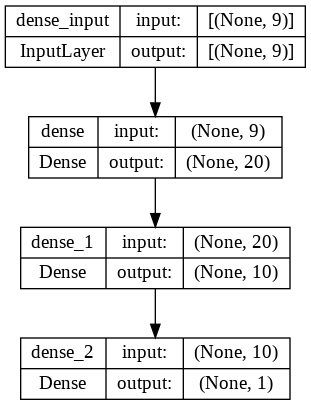

In [ ]:
# membuat sketsa deep learning
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# New Section

In [ ]:
# Compile model
model.compile(
    optimizer='adam',
    loss='mae',
)

In [ ]:
# Pengecekan error
history = model.fit(
    train_X, train_y,
    validation_data=(valid_X, valid_y),
    batch_size=50,
    epochs=60,
)

Epoch 1/60
1012/1012 [==============================] - 3s 2ms/step - loss: 1.2464 - val_loss: 1.1862
Epoch 2/60
1012/1012 [==============================] - 2s 2ms/step - loss: 1.2186 - val_loss: 1.1862
Epoch 3/60
1012/1012 [==============================] - 2s 2ms/step - loss: 1.2186 - val_loss: 1.1862
Epoch 4/60
1012/1012 [==============================] - 2s 2ms/step - loss: 1.2186 - val_loss: 1.1862
Epoch 5/60
1012/1012 [==============================] - 2s 2ms/step - loss: 1.2186 - val_loss: 1.1862
Epoch 6/60
1012/1012 [==============================] - 2s 2ms/step - loss: 1.2186 - val_loss: 1.1862
Epoch 7/60
1012/1012 [==============================] - 2s 2ms/step - loss: 1.2186 - val_loss: 1.1862
Epoch 8/60
1012/1012 [==============================] - 2s 2ms/step - loss: 1.2186 - val_loss: 1.1862
Epoch 9/60
1012/1012 [==============================] - 2s 2ms/step - loss: 1.2186 - val_loss: 1.1862
Epoch 10/60
1012/1012 [==============================] - 2s 2ms/step - loss: 1.218

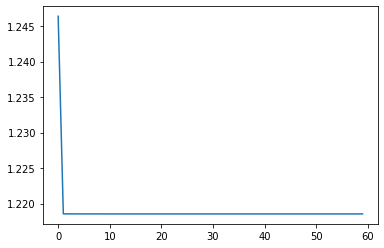

In [ ]:
# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
history_df['loss'].plot();

In [ ]:
valid_X.shape

(12640, 9)

In [ ]:
# Pengecekan deep learning terhadap dataset
data_test = valid_X.iloc[5:10]
data_test.shape
print(data_test)

        time  channel1  channel2  channel3  channel4  channel5  channel6  \
48104  49924   0.00011   0.00015   0.00036   0.00039   0.00041   0.00006   
48997  50847   0.00002   0.00003   0.00011   0.00020   0.00017   0.00023   
22760  23539   0.00000   0.00002   0.00004   0.00002  -0.00001  -0.00001   
36501  37907  -0.00020  -0.00007   0.00000   0.00013   0.00006  -0.00038   
62080  64443  -0.00005  -0.00003  -0.00001  -0.00002  -0.00002  -0.00002   

       channel7  channel8  
48104   0.00011   0.00006  
48997   0.00009   0.00004  
22760  -0.00001  -0.00001  
36501  -0.00049  -0.00021  
62080   0.00003  -0.00001  


In [ ]:
# Hasil prediksi
hasil_prediksi = model.predict(data_test)
print(hasil_prediksi)

1/1 [==============================] - 0s 77ms/step
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [ ]:
# Hasil aktual
hasil_actual = valid_y.iloc[5:10]
print(hasil_actual)

48104    0
48997    4
22760    0
36501    0
62080    0
Name: result, dtype: int64
